### Links
Tutorial Link: https://medium.com/hacktive-devs/recommender-system-made-easy-with-scikit-surprise-569cbb689824

Data source: https://grouplens.org/datasets/movielens/100k/

Link to surprise documentation: https://surprise.readthedocs.io/en/stable/index.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ratings_small.csv')

In [3]:
data.shape

(100004, 4)

In [4]:
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
data.shape

(100004, 4)

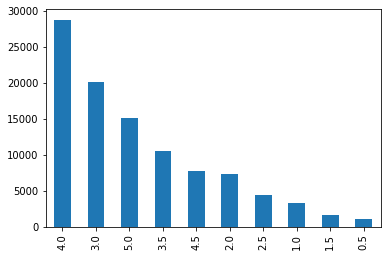

In [6]:

data.rating.value_counts().plot(kind='bar')
plt.show()

#### Check for null values in data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

#### subset the data for relevant columns
https://medium.com/hacktive-devs/recommender-system-made-easy-with-scikit-surprise-569cbb689824

In [9]:
data = data[['userId', 'movieId', 'rating', 'timestamp']]
data = data.iloc[:, :-1]

In [10]:
data.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [13]:
#!pip install surprise

  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-win_amd64.whl size=722395 sha256=01801225726093c2ba6b5291357f9bad16dccb1552bd979fb659b17208990787
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\de\9a\41\6a57bf37eb7b50de7f8c7ca9d7053bebe0ea7c7c9bae9fa293
Successfully built scikit-surprise


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [14]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [15]:
#data.columns = ['userId','movieId','raw_ratings']

In [16]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)

In [17]:
from surprise import SVD, accuracy
algo = SVD()
algo.fit(trainset)

In [18]:
predictions = algo.test(testset)

In [19]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.8992


0.8992282551062729

In [20]:
unknown_ratings = []
for prediction in predictions:
    if prediction.details['was_impossible']==True:
        unknown_ratings.append(prediction)

In [21]:
unknown_ratings

[]

In [22]:
predictions[1].details['was_impossible']

False

In [ ]:
###